<a href="https://colab.research.google.com/github/karsarobert/Machine_learning_2024/blob/main/10/PTE_ML10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 9. Gyakorlat: Naive Bayes módszer, természetes nyelv feldolgozás NLP
### 2024. április 23.

#Naive Bayes megértése
A Naive Bayes osztályozót általában szöveges adatok osztályozására használják. A következő szakaszokban megnézzük a különböző változatait, és megtanuljuk, hogyan konfigurálhatjuk a paramétereiket. De először is, hogy megértsük a Naive Bayes osztályozót, először is át kell tekintenünk Thomas Bayes tételét, amelyet a 18. században publikált.

#Valószínűségek

Gyakoriság: Ahányszor bekövetkezik az esemény az elvégzett valahány kísérlet során.

Relatív gyakoriság: Gyakoriság (=sikerek száma) osztva az összes kísérletek számával. Például ha 10
kísérletből 6-szor következik be a szóban forgó esemény, akkor az elvégzett kísérletsorozatban az esemény
relatív gyakorisága 0,6. A relatív gyakoriság azt mutatja, hogy az összes kísérlet hányad részében következett be az esemény.

Valószínűség: Egy adott eseményt vizsgálva azt tapasztaljuk, hogy sok kísérlet esetén a relatív gyakoriság közel van egy olyan értékhez, ami nem függ a véletlentől, hanem az eseményre jellemző. Ezt az értéket
nevezzük az esemény valószínűségének. A relatív gyakoriság kevés kísérlet esetén erősen eltérhet a valószínuségtől, de a kísérletszám növekedtével egyre közelebb kerül hozzá.

Egy osztály valószínűségét, **P(y), előzetes valószínűség** nevezzük. Ez lényegében azoknak a mintáknak a száma, amelyek az összes képzési minta közül egy bizonyos osztályba tartoznak. kedvező kimenetek száma/összes kimenetek számával. A **feltételes valószínűséget, P(x|y)**, valószínűségnek nevezzük. A “ 6-ost dobunk, B “ páros számot dobunk.
Ekkor P(A|B) = 1/3. Ezt számítjuk ki a képzési mintákból. Miután a két valószínűség ismert a képzés idején, felhasználhatjuk őket arra, hogy megjósoljuk annak az esélyét, hogy egy új minta egy bizonyos osztályba tartozik az előrejelzés idején, **P(y|x), más néven az utólagos valószínűség**. Az egyenlet valószínűségi részének kiszámítása nem olyan egyszerű, mint ahogyan azt várnánk. Itt a Bayes tételhez kell folyamodjunk! Ezért a következő részben azt tárgyaljuk, hogy milyen feltételezéssel könnyíthetjük meg ezt a számítást.

$$
P(y~|~{\rm x}) = \frac{P({\rm x}~|~y)P(y)}{P({\rm x})}
$$

#A Bayes-szabály
Bayesi osztályozás
A Naive Bayes osztályozók a Bayes-féle osztályozási módszerekre épülnek. Ezek a Bayes-tételre támaszkodnak, amely egy olyan egyenlet, amely statisztikai mennyiségek feltételes valószínűségeinek kapcsolatát írja le. A Bayes-osztályozásban egy címke valószínűségét keressük néhány megfigyelt jellemző alapján, amit $P(L~|~{\rm features})$ -ként írhatunk le. A Bayes-tétel megmondja, hogyan fejezhetjük ki ezt olyan mennyiségek formájában, amelyeket közvetlenebbül tudunk kiszámítani:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$



Ha két címke között próbálunk dönteni - nevezzük őket L1-nek és L2-nek -, akkor a döntés egyik módja az, hogy kiszámítjuk az egyes címkékre vonatkozó utólagos valószínűségek arányát:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

Most már csak egy modellre van szükségünk, amellyel kiszámíthatjuk a $P({\rm features}~|~L_i)$ értéket minden egyes címkére. Az ilyen modellt generatív modellnek nevezzük, mert meghatározza azt a hipotetikus véletlen folyamatot, amely az adatokat generálja. Ennek a generatív modellnek a megadása minden egyes címkére az ilyen Bayes-osztályozó képzésének fő része. Az ilyen képzési lépés általános változata nagyon nehéz feladat, de egyszerűsíthetjük azt a modell formájára vonatkozó néhány egyszerűsítő feltevés alkalmazásával.

Itt jön be a "naiv" a "naiv Bayes"-ben: ha nagyon naiv feltételezéseket teszünk az egyes címkék generatív modelljével kapcsolatban, akkor minden egyes osztályhoz megtalálhatjuk a generatív modell durva közelítését, és ezután folytathatjuk a Bayes-osztályozást. A naiv Bayes-osztályozók különböző típusai különböző naiv feltételezéseken alapulnak az adatokkal kapcsolatban, és ezek közül a következő szakaszokban néhányat megvizsgálunk.


#Példa
Egy gyárban anyaghibás és méterhibás gyártmányok is készülnek,
és ezek a teljes mennyiség 25 illetve 40 százalékát teszik ki. A mérethibás
darabok ötöde anyaghibás is egyben. Az anyaghibás gyártmányos mekkora
hányada mérethibás?

$$
P(mérethibás~|~{\rm anyaghibás}) = \frac{P({\rm anyaghibás}~|~mérethibás)P(mérethibás)}{P({\rm anyaghibás})} = \frac{0,2 * 0,4}{0,25} = 0,32
$$

#A valószínűség naiv kiszámítása
Egy adatminta több jellemzőből áll, ami azt jelenti, hogy a valóságban a P(x|y) x része x1, x2, x3, .... xk, ahol k a jellemzők száma. Így a feltételes valószínűség a következőképpen fejezhető ki: P(x1, x2, x3, .... xk|y). A gyakorlatban ez azt jelenti, hogy ezt a feltételes valószínűséget az x összes lehetséges kombinációjára ki kell számolnunk. Ennek fő hátránya a modelljeink általánosításának hiánya.

Használjuk a következő példát, hogy a dolgok világosabbá váljanak:

A szöveg azt sugallja, hogy az író szereti a gyümölcsöt?

|X|y|
|------|------|
|Szeretem az almát|Igen|
|Szeretem a narancsot|Igen|
|Utálom a körtét|Nem|

Ha az előző táblázat a képzési adataink, akkor az első minta valószínűsége, **P(x|y), az a valószínűség, hogy a három szót, az Szeretem az almát együtt látjuk, ha a cél, az Igen**. Hasonlóképpen, a második minta esetében ez annak a valószínűsége, hogy a három szót, hogy szeretem és narancsot együtt látjuk, ha a cél, Igen. Ugyanez vonatkozik a harmadik mintára is, ahol a cél az Igen helyett a Nem.
Tegyük fel, hogy kapunk egy új mintát: Utálom az almát. A probléma az, hogy ezt a három szót még soha nem láttuk együtt. Mondhatnánk, hogy "De a mondat minden egyes szavát láttuk már korábban, csak külön-külön!". Ez igaz, de a képletünk csak a szavak kombinációival törődik. Az egyes különálló tulajdonságokból önmagukban semmit sem tud megtanulni.

A P(x1, x2, x3, .... xk|y) csak úgy fejezhető ki, hogy P(x1|y)* P(x2|y)x3* ... * P(xk|y), ha x1, x2, x3, .... xk függetlenek. Függetlenségükben nem lehetünk biztosak, mégis megtesszük ezt a naiv feltételezést, hogy a modell általánosíthatóbbá váljon.
**E feltételezés és a különálló szavakkal való foglalkozás eredményeként most megtudhatunk valamit az Utálom az almát kifejezésről,** annak ellenére, hogy korábban nem láttuk. A függetlenségnek ez a naiv, mégis hasznos feltételezése adta az osztályozó nevének a "naiv" előtagot.



#Példa
Tegyük fel, hogy egy orvos a következő rákszűrési tesztről számolt be 10 000 ember körében:

||Rákos|Nem rákos|Összes|
|------|------|------|------|
|Teszt pozitív|80|900|980|
|Teszt negatív|20|9000|9020|
|Összesen|100|9900|10000|

Ez azt jelzi, hogy 100 rákos beteg közül 80-nál helyesen diagnosztizálnak, míg a többi 20-nál nem; 9900 egészséges ember közül 900-nál hamisan észlelik a rákot.

Ha egy személyen a szűrővizsgálat eredménye pozitív, mennyi a valószínűsége, hogy valóban rákos?
Jelöljök a rákos eseményt C-vel és a pozitív teszteredményt Pos értékkel. Tehát P(Pos |C) = 80/100 = 0,8, P(C) = 100/10000 = 0,01 és P(Pos) = 980/10000 = 0,098.

Alkalmazhatjuk Bayes tételét a P(C |Pos) kiszámítására :

$$
P(C~|~{\rm Pos}) = \frac{P({\rm Pos}~|~C)P(C)}{P({\rm Pos})} = \frac{0.8 *0.01}{0.098} = 8.16
$$

Pozitív szűrési eredmény esetén 8,16% az esélye annak, hogy az alany rákos lesz, ami szignifikánsan magasabb, mint az általános feltételezés (100/10000=1%) anélkül, hogy az alany átesett volna a szűrésen.

#Additív simítás
Ha egy, a képzés során nem látott kifejezés megjelenik a predikció során, akkor annak valószínűségét 0-ra állítjuk. Ez logikusan hangzik, mégis problémás döntés, ha figyelembe vesszük a naiv feltételezésünket. Mivel P(x1, x2, x3, .... xk|y) egyenlő P(x1|y)* P(x2|y)*P(x3|y) * ... * P(xk|y), bármelyik kifejezés feltételes valószínűségének nullára állítása eredményeként a teljes P(x1, x2, x3, .... xk|y) nulla lesz. E probléma elkerülése érdekében úgy teszünk, mintha minden osztályhoz egy új adatpontot adnánk, amely a teljes szókincset tartalmazza. Fogalmilag ez az új hipotetikus dokumentum elveszi a látott kifejezésekhez rendelt valószínűségi tömeg egy részét, és újra hozzárendeli a nem látott kifejezésekhez.
##alfa paraméter
Az alfa paraméter szabályozza, hogy a valószínűségi tömeg mekkora részét akarjuk újra hozzárendelni a nem látott kifejezésekhez. Az alfa érték 1-re állítása Laplace-simításnak, míg a 0 és 1 közötti értékek beállítása Lidstonessimításnak nevezhető.


#Példa additív simításhoz
10 000 ember látott egy linket, és közülük 9000 kattintott rá. Az átkattintási arányt nyilvánvalóan 90%-ra becsülhetjük.

Ha adatainkban csak egy személy szerepel, és az a személy látta a linket, és rákattintott, elég magabiztosak lennénk ahhoz, hogy azt mondjuk, hogy az átkattintási arány 100%-os volt?

Az előző példákban, ha úgy tennénk, mintha két további felhasználó lenne, akik közül csak az egyik kattintott a linkre, akkor az első példában az átkattintási arány 10 002-ből 9 001 lenne, ami még mindig majdnem 90%. A második példában azonban 2-t osztanánk 3-mal, ami a korábban kiszámított 100% helyett 60%-ot eredményezne. A Laplace-simítás és a Lidstone-simítás a Bayes-féle gondolkodásmódhoz köthető. Az a két felhasználó, akiknek 50%-a kattintott a linkre, az az előzetes hiedelmünk. Kezdetben nem sokat tudunk, ezért feltételezzük az 50%-os kattintási arányt. Nos, az első példában elegendő adatunk van ahhoz, hogy ezt az előzetes meggyőződést felülbíráljuk, míg a második esetben a kevesebb adatpont csak ennyire tudta elmozdítani az előzetes meggyőződést.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

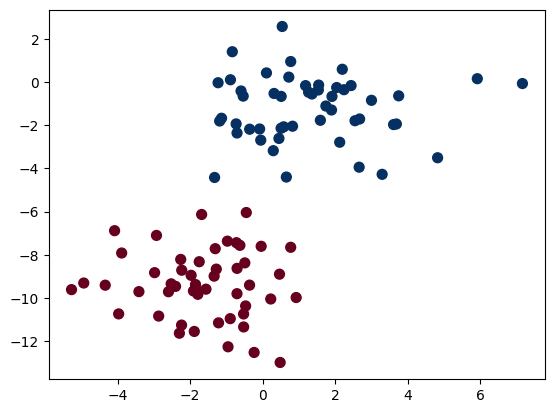

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [ ]:
rng = np.random.RandomState(0) # véletlen pontok generálása a tanítóadatok körül
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

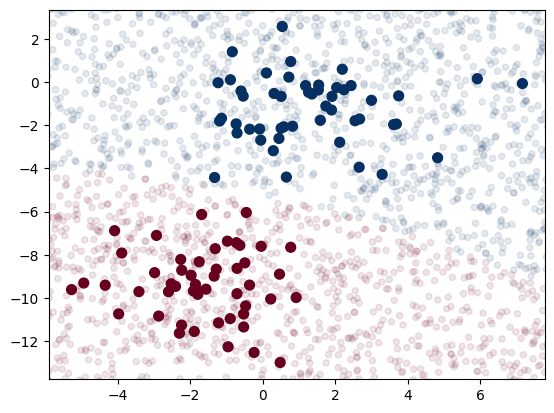

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu') #tanító adatok kirajzolása
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1) # a teszt pontok kirajzolása
plt.axis(lim);

#Szövegek feldolgozása
##Tokenizálás
Eddig az adatok, amelyekkel eddig foglalkoztunk, vagy táblázatos adatok voltak oszlopokkal, mint jellemzőkkel, vagy képi adatok pixelekkel, mint jellemzőkkel. A szöveg esetében a dolgok kevésbé egyértelműek. Mondatokat, szavakat vagy karaktereket használjunk jellemzőként? A mondatok nagyon specifikusak. Például nagyon valószínűtlen, hogy pontosan ugyanaz a mondat jelenjen meg két vagy több Wikipedia-cikkben. Ezért ha mondatokat használunk jellemzőként, akkor rengeteg olyan jellemzőt fogunk kapni, amelyek nem jól általánosíthatók.

A karakterek ezzel szemben korlátozottak. Az angol nyelvben például csak 26 betű van. Ez a kis változatosság valószínűleg korlátozza a különálló karakterek azon képességét, hogy elegendő információt hordozzanak a későbbi algoritmusok számára a kinyeréshez. Ennek eredményeképpen a legtöbb feladatban jellemzően szavakat használnak jellemzőként.

Maradjunk a szavaknál mint jellemzőknél. Végül nem akarunk a szótári szavakra szorítkozni; a Twitter hashtagek, számok és URL-ek is kivonhatók a szövegből, és feature-ként kezelhetők. Ezért használjuk inkább a token kifejezést a szó helyett, mivel az általánosabb. Azt a folyamatot, amikor egy szövegfolyamot tokenekre bontunk, tokenizálásnak nevezzük, és ezzel a következő részben fogunk megismerkedni.

#Tokenizálás string osztással
A különböző tokenizálási módszerek különböző eredményekhez vezetnek. Hogy bemutassuk ezeket a különbségeket, vegyük a következő három sornyi szöveget, és nézzük meg, hogyan tudjuk tokenizálni őket.

Itt a szövegsorokat karakterláncokként írom le, és egy listába teszem őket:

In [ ]:
lines = [
    'How to tokenize?\nLike a boss.',
    'Google is accessible via http://www.google.com',
    '1000 new followers! #TwitterFamous',
]

In [ ]:
for line in lines:
    print(line.split())

['How', 'to', 'tokenize?', 'Like', 'a', 'boss.']
['Google', 'is', 'accessible', 'via', 'http://www.google.com']
['1000', 'new', 'followers!', '#TwitterFamous']


Észreveheti, hogy az írásjelek a tokenek részeként maradtak meg. A kérdőjel a tokenize végén maradt, a pont pedig a boss-hoz csatolva maradt. A hashtag két szóból áll, de mivel nincs köztük szóköz, egyetlen tokenként maradt meg a vezető hash-jelével együtt.

Tokenizálás reguláris kifejezésekkel
A reguláris kifejezésekkel is kezelhetjük a betű- és számsorozatokat tokenekként, és a mondatainkat ennek megfelelően tagolhatjuk. Az itt használt minta, a "\w+", egy vagy több alfanumerikus karakterből vagy aláhúzásból álló sorozatra utal. A mintáink összeállításával egy reguláris kifejezés objektumot kapunk, amelyet a megfeleltetéshez használhatunk. Végül végighaladunk minden egyes soron, és a reguláris kifejezés objektumot használjuk a sorok tokenekre bontására:

In [ ]:
import re
_token_pattern = r"\w+"
token_pattern = re.compile(_token_pattern)

for line in lines:
    print(token_pattern.findall(line))

['How', 'to', 'tokenize', 'Like', 'a', 'boss']
['Google', 'is', 'accessible', 'via', 'http', 'www', 'google', 'com']
['1000', 'new', 'followers', 'TwitterFamous']


#Helyőrző használata a tokenizálás előtt
Az előző probléma megoldása érdekében dönthetünk úgy, hogy a mondatok tokenizálása előtt a számokat, URL-eket és hashtageket helyőrzővel helyettesítjük. Ez akkor hasznos, ha nem igazán érdekel minket a tartalmuk megkülönböztetése. Egy URL lehet számomra csak egy URL, függetlenül attól, hogy hová vezet. A következő függvény a bemenetet kisbetűvé alakítja, majd minden megtalált URL-t _url_ helyőrzővel helyettesít. Hasonlóképpen, a hashtageket és a számokat a megfelelő helyőrzőkké alakítja át. Végül a bemenetet a szóközök alapján felosztja, és az így kapott tokeneket adja vissza:

In [ ]:
_token_pattern = r"\w+"
token_pattern = re.compile(_token_pattern)

def tokenizer(line):
    line = line.lower()
    line = re.sub(r'http[s]?://[\w\/\-\.\?]+','_url_', line)
    line = re.sub(r'#\w+', '_hashtag_', line)
    line = re.sub(r'\d+','_num_', line)
    return token_pattern.findall(line)

for line in lines:
    print(tokenizer(line))

['how', 'to', 'tokenize', 'like', 'a', 'boss']
['google', 'is', 'accessible', 'via', '_url_']
['_num_', 'new', 'followers', '_hashtag_']


Mint látható, az új helyőrző azt mondja, hogy a második mondatban létezett egy URL, de nem igazán érdekli, hogy az URL hova mutat. Ha van egy másik mondatunk más URL-címmel, akkor is csak ugyanazt a helyőrzőt kapja. Ugyanez vonatkozik a számokra és a hashtagekre is.

A felhasználási esettől függően ez nem biztos, hogy ideális, ha a hashtagek olyan információkat hordoznak, amelyeket nem szeretne elveszíteni. Ez is egy olyan kompromisszum, amelyet a felhasználási esete alapján kell megkötnie. Általában intuitív módon meg tudja mondani, hogy melyik technika alkalmasabb az adott problémára, de néha a modell több tokenizálási technika utáni kiértékelése lehet az egyetlen módja annak, hogy megmondja, melyik a megfelelőbb. Végül a gyakorlatban olyan könyvtárakat használhat, mint az NLTK és a spaCy, hogy tokenizálja a szöveget. Ezek már rendelkeznek a szükséges reguláris kifejezésekkel a motorháztető alatt. A spaCy-t a későbbiekben fogjuk használni ebben a leckében.

#Szöveg vektorizálása mátrixokká
A természetes nyelvfeldolgozásban az adathalmazt általában korpusznak nevezik. A benne lévő egyes adatmintákat általában dokumentumnak nevezik. A dokumentumok tokenekből állnak, és a különböző tokenek halmazát szókincsnek nevezzük. Ezen információk mátrixba helyezését vektorizálásnak nevezzük. A következő szakaszokban megnézzük, hogy milyen különböző vektorizációkat kaphatunk.

##Vektortér modell
Még mindig hiányoznak szeretett jellemzőmátrixaink, ahol minden tokenhez saját oszlopot várunk, és minden dokumentumot külön sorral reprezentálunk. A szöveges adatok ilyen jellegű reprezentációját vektortérmodellnek nevezzük. Lineáris-algebrai szempontból a dokumentumokat ebben a reprezentációban vektoroknak (soroknak) tekintjük, a különböző kifejezések pedig ennek a térnek a dimenzióit (oszlopokat) jelentik, innen a vektortérmodell elnevezés. A következő részben megtanuljuk, hogyan vektorizáljuk dokumentumainkat.

##Szavak zsákja
A dokumentumokat tokenekké kell alakítanunk és a vektortérmodellbe helyeznünk. A CountVectorizer itt használható a dokumentumok tokenizálására és a kívánt mátrixba helyezésére. Itt az előző részben létrehozott tokenizáló segítségével fogjuk használni. A szokásos módon importáljuk és inicializáljuk a CountVectorizer-t, majd a fit_transform metódusát használjuk a dokumentumaink átalakítására. Azt is megadtuk, hogy az előző szakaszban készített tokenizálót szeretnénk használni:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(lowercase=True, tokenizer=tokenizer)
x = vec.fit_transform(lines)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


A visszaadott mátrix legtöbb cellája nulla. Helytakarékossági okokból ritka mátrixként kerül elmentésre; azonban a todense() metódus segítségével sűrű mátrixszá alakíthatjuk. A vektorizáló tárolja a találkozott szókészletet, amelyet a get_feature_names() segítségével kérhetünk le. Ezt az információt felhasználva az x-et DataFrame-mé alakíthatjuk a következőképpen:

In [ ]:
import pandas as pd

pd.DataFrame(x.todense(), columns=vec.vocabulary_)

,how,to,tokenize,like,a,boss,google,is,accessible,via,_url_,_num_,new,followers,_hashtag_
0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


Az egyes cellák tartalmazzák, hogy az egyes tokenek hányszor fordulnak elő az egyes dokumentumokban. A szókincs azonban nem követ semmilyen sorrendet, ezért ebből a mátrixból nem lehet megállapítani az egyes dokumentumokban szereplő tokenek sorrendjét.

Különböző mondatok, azonos ábrázolás
Vegyük ezt a két ellentétes jelentésű mondatot:

In [ ]:
flight_delayed_lines = [
    'Flight was delayed, I am not happy',
    'Flight was not delayed, I am happy'
]
x = vec.fit_transform(flight_delayed_lines)
pd.DataFrame(
    x.todense(), columns=vec.vocabulary_
    )


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,flight,was,delayed,i,am,not,happy
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1


#N-grammok
Ahelyett, hogy minden egyes kifejezést tokenként kezelnénk, a két egymást követő kifejezés kombinációit egyetlen tokenként kezelhetjük. Ehhez mindössze annyit kell tennünk, hogy a CountVectorizerben az ngram_range értéket (2,2) értékre állítjuk, a következőképpen:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(3,3))
x = vec.fit_transform(flight_delayed_lines)

pd.DataFrame(
    x.todense(), columns=vec.vocabulary_
   )


,flight was delayed,was delayed am,delayed am not,am not happy,flight was not,was not delayed,not delayed am,delayed am happy
0,1,0,1,1,0,0,1,0
1,0,1,0,0,1,1,0,1


Most már meg tudjuk mondani, hogy ki boldog és ki nem. Ha szópárokat használunk, ezt bigramnak nevezzük. Csinálhatunk 3grammokat (három egymást követő szóval), 4grammokat vagy bármilyen más számú grammot is. Az ngram_range (1,1)-re állítása visszavisz minket az eredeti reprezentációhoz, ahol minden egyes különálló szó egy token, ami unigramok. Az ngram_rang (1,2)-re állításával az unigrammokat bigrammokkal is keverhetjük. Röviden, ez a tartomány megmondja a tokenizálónak, hogy milyen minimális és maximális értékeket használjon n-grammjainkban.

Ha az n értéket magasra - mondjuk 8-ra - állítjuk, ez azt jelenti, hogy a nyolc szóból álló szekvenciákat tokenekként kezeljük. Mit gondol, mennyire valószínű, hogy egy nyolc szóból álló sorozat többször is előfordul az adathalmazban? A legvalószínűbb, hogy egyszer fog megjelenni a gyakorlóhalmazban, és soha többé a teszthalmazban. Ezért az n értéket általában 2 és 3 közé állítjuk, és néhány unigrammát is használunk a ritka szavak megragadására.

#Szavak helyett karakterek használata
Eddig a szavak voltak a szöveges univerzumunk atomjai. Bizonyos helyzetekben azonban szükség lehet arra, hogy dokumentumainkat karakterek alapján tokenizáljuk. Azokban a helyzetekben, ahol a szavak határai nem egyértelműek, például hashtagekben és URL-címekben, a karakterek tokenként való használata segíthet. A természetes nyelvek általában különböző gyakorisággal használják a karaktereket. Az e betű a leggyakrabban használt karakter az angol nyelvben, és az olyan karakterkombinációk, mint a th, er és on is nagyon gyakoriak. Más nyelvekben, például a franciában és a hollandban eltérő a karakterek gyakorisága. Ha a célunk a dokumentumok nyelvük alapján történő osztályozása, akkor a szavak helyett a karakterek használata jól jöhet.

Ugyanez a CountVectorizer segíthet nekünk a dokumentumaink karakterek szerinti tokenizálásában. Ezt kombinálhatjuk az n-grammok beállítással is, hogy a szavakon belüli részsorozatokat kapjunk, a következőképpen:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer='char', ngram_range=(4,4))
x = vec.fit_transform(flight_delayed_lines)

pd.DataFrame(
    x.todense(),
    columns=vec.vocabulary_
)

,flig,ligh,ight,ght,ht w,t wa,was,was,as d,s de,...,t ha,hap,happ,appy,as n,s no,ot d,t de,am h,m ha
0,1,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,1,1,1,1
1,1,1,1,1,1,1,1,1,0,1,...,1,1,0,0,1,1,0,1,1,1


Mostantól minden token négy karakterből áll. A szóközöket is karakterként kezeljük, ahogy láthatod. A karakterek esetében gyakrabban használjuk az n nagyobb értékeit.

#Magyarnyelvű szöveg osztályozása

index.hu portálon megjelent cikkek osztályozása

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/index_articles.csv', header=0)

X = df.Body
y = df.category

#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()

#y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df.head()

,Title,Body,category,url,text
0,Lángoló kamion miatt zárták le az M5-öst Szege...,Teljes terjedelmében ég egy kamion szombat kor...,belfold,http://index.hu/belfold/2017/06/03/langolo_kam...,Lángoló kamion miatt zárták le az M5-öst Szege...
1,Kigyulladt egy lakatlan épület a XII. kerületben,Kigyulladt egy kb. négyszáz négyzetméter alapt...,belfold,http://index.hu/belfold/2017/06/03/kigyulladt_...,Kigyulladt egy lakatlan épület a XII. kerületb...
2,Dubrovniknak elege lett a meztelen turistákból,A városi tanács döntése értelmében hamarosan p...,gazdasag,http://index.hu/gazdasag/2016/07/26/nincs_tobb...,Dubrovniknak elege lett a meztelen turistákból...
3,Húsz éve nem házasodtak ennyien Magyarországon,2016 januárja és novembere között a legmagasab...,gazdasag,http://index.hu/gazdasag/2017/02/14/husz_eve_n...,Húsz éve nem házasodtak ennyien Magyarországon...
4,Kútba esett egy asszony Nógrádban,Kútba esett egy asszony a Nógrád megyei Szurdo...,belfold,http://index.hu/belfold/hirek/2013/10/24/kutba...,Kútba esett egy asszony Nógrádban\n\nKútba ese...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='char', ngram_range=(1,5)) # analyzer='char', ngram_range=(1,5) próbáljuk ki a karakterszintű tokenizálással is

x_train = vec.fit_transform(X_train)
x_test = vec.transform(X_test)



In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(fit_prior=True) # Az osztály előzetes valószínűségeinek megtanulása, ha hamis akkor egyenletes előfeltevést használunk.
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred) # macro avg az osztályok értékeinek átlaga, a súlyozott figyelembe veszi az osztályba tartozó elemszámot is
print(report)

              precision    recall  f1-score   support

     belfold       0.84      0.94      0.89       713
    gazdasag       0.86      0.88      0.87       464
      kultur       0.95      0.34      0.50       112
        tech       0.96      0.86      0.91       203

    accuracy                           0.86      1492
   macro avg       0.90      0.75      0.79      1492
weighted avg       0.87      0.86      0.86      1492



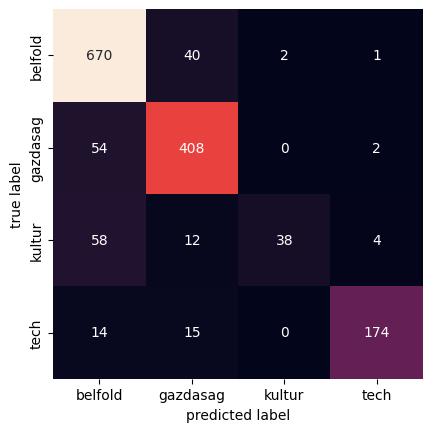

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_   #list(set(y_test_pred))
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels = labels)
plt.ylabel('true label')
plt.xlabel('predicted label');

#TF-IDF (haladó téma)
Az információkeresésben a tf–idf, a gyakoriság–inverz dokumentumgyakoriság rövidítése, egy numerikus statisztika, amelynek célja, hogy tükrözze, mennyire fontos egy szó egy gyűjteményben vagy korpuszban lévő dokumentum számára.

In [ ]:
lines_fruits = [
    'I like apples',
    'I like oranges',
    'I like pears',
]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(token_pattern=r'\w+')

x = vec.fit_transform(lines_fruits)

count_feature_array = vec.get_feature_names_out()
x.toarray(order='F') #vektorok
pd.DataFrame(x.todense(),columns=count_feature_array)

,apples,i,like,oranges,pears
0,0.767495,0.453295,0.453295,0.000000,0.000000
1,0.000000,0.453295,0.453295,0.767495,0.000000
2,0.000000,0.453295,0.453295,0.000000,0.767495


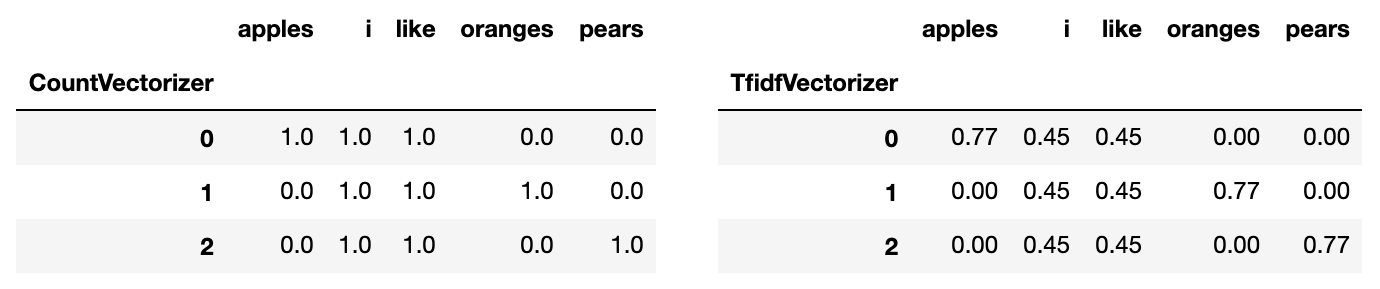
Mint látható, a CountVectorizerrel ellentétben a TfidfVectorizer nem minden szót kezel egyformán. Nagyobb hangsúlyt kapott a gyümölcsök neve a többi, kevésbé informatív szóhoz képest, amelyek történetesen mindhárom mondatban előfordultak.

Mind a CountVectorizer, mind aTfidfVectorizer rendelkezik egy stop_words nevű paraméterrel. Ezzel megadhatók a figyelmen kívül hagyandó tokenek. Megadhatja a kevésbé informatív szavak saját listáját, mint például az a, an és the. Megadhatja az englishkeyword paramétert is az angol nyelvben gyakori stop szavak megadásához. Mindezek után fontos megjegyezni, hogy egyes szavak informatívak lehetnek az egyik feladathoz, de egy másikhoz nem. Továbbá az IDF általában automatikusan elvégzi azt, amire szüksége van, és alacsony súlyt ad a nem informatív szavaknak. Ezért általában nem szoktam manuálisan eltávolítani a stop szavakat, ehelyett inkább olyan dolgokat próbálok ki, mint a TfidfVectorizer, a feature selection és a regularizationfirst.

Az eredeti felhasználási esetén kívül a TfidfVectorizer-t általában szövegosztályozás előfeldolgozási lépésként használják. Mindazonáltal általában jó eredményeket ad, amikor hosszabb dokumentumokat kell osztályozni. Rövid dokumentumok esetén zajos átalakítást eredményezhet, és ilyen esetekben tanácsos a CountVectorizer-t kipróbálni.

Egy egyszerű keresőmotorban, amikor valaki beír egy lekérdezést, azt a TF-IDF segítségével ugyanabba a vektortérbe konvertálja, ahol az összes keresendő dokumentum létezik. Miután a keresési lekérdezés és a dokumentumok vektorokként léteznek ugyanabban a térben, egy egyszerű távolságmérő, például a koszinusz távolság segítségével meg lehet találni a lekérdezéshez legközelebbi dokumentumokat. A modern keresőmotorok eltérnek ettől az alapötlettől, de ez egy jó alap az információkeresés megértéséhez.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1,3))

x_train_tfidf = vec.fit_transform(X_train)
x_test_tfidf = vec.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_tfidf = MultinomialNB(fit_prior=True)
clf_tfidf.fit(x_train_tfidf, y_train)
y_test_pred_tfidf = clf_tfidf.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred_tfidf) #
print(report)

              precision    recall  f1-score   support

     belfold       0.58      1.00      0.73       713
    gazdasag       0.92      0.53      0.67       464
      kultur       0.00      0.00      0.00       112
        tech       1.00      0.00      0.01       203

    accuracy                           0.64      1492
   macro avg       0.63      0.38      0.35      1492
weighted avg       0.70      0.64      0.56      1492



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Osztályozás logisztikus regresszióval
sokkal lassabb!!!

In [ ]:
#from sklearn.linear_model import LogisticRegression


#clf = SGDClassifier(loss='log', max_iter=10000, class_weight='balanced')
#clflr = LogisticRegression(max_iter=10000, class_weight=None)

#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

#clflr.fit(x_train, y_train)
#y_test_pred_lr = clflr.predict(x_test)

In [ ]:
#report = classification_report(y_test, y_test_pred_lr) #
#print(report)

#Pipeline és Gridsearch alkalmazása

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline(steps=[
    ('CountVectorizer', CountVectorizer()),
    ('MultinomialNB', MultinomialNB())]
)

GaussianNB → Ha folyamatos jellemzőkkel rendelkezik.

CategoricalNB → Ha kategorikus adatokkal rendelkezik.

MultinomialNB → Szöveges adatokra alkalmazva.


In [ ]:
param_grid = {
    'CountVectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'MultinomialNB__alpha': [0.1, 1],
    'MultinomialNB__fit_prior': [True, False], #Az osztály előzetes valószínűségeinek megtanulása vagy sem. Ha hamis, akkor egyenletes előfeltevést használunk.
}

In [ ]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, param_grid, scoring='precision_macro', n_jobs=-1)
search.fit(X_train, y_train) # nagy X az eredeti szöveges adatokat jelenti
print(search.best_params_)

{'CountVectorizer__ngram_range': (1, 2), 'MultinomialNB__alpha': 0.1, 'MultinomialNB__fit_prior': True}


In [ ]:
y_test_pred = search.predict(X_test) # a legjobb modellt használjuk

In [ ]:
report = classification_report(y_test, y_test_pred) # macro avg az osztályok értékeinek átlaga, a súlyozott figyelembe veszi az osztályba tartozó elemszámot is
print(report)

              precision    recall  f1-score   support

     belfold       0.88      0.94      0.91       713
    gazdasag       0.86      0.89      0.88       464
      kultur       0.98      0.46      0.62       112
        tech       0.94      0.90      0.92       203

    accuracy                           0.88      1492
   macro avg       0.91      0.80      0.83      1492
weighted avg       0.89      0.88      0.88      1492



#Mikor használjuk a Naive Bayes-t
Mivel a naiv Bayes-osztályozók szigorú feltételezéseket tesznek az adatokról, általában nem fognak olyan jól teljesíteni, mint egy bonyolultabb modell. Ennek ellenére számos előnyük van:

* Rendkívül gyorsak mind a képzés, mind az előrejelzés során.

* Egyszerű valószínűségi előrejelzést biztosítanak.

* Gyakran nagyon könnyen értelmezhetőek
* Nagyon kevés (ha van egyáltalán) hangolható paraméterük.

Ezek az előnyök azt jelentik, hogy a naiv Bayes-osztályozó gyakran jó választás kezdeti alapszintű osztályozásként.

Ha megfelelően teljesít, akkor gratulálunk: egy nagyon gyors, jól értelmezhető osztályozóval rendelkezik a problémájához. Ha nem teljesít jól, akkor elkezdheti a kifinomultabb modellek feltárását, némi alapismeret birtokában arról, hogy ezeknek milyen jól kell teljesíteniük.

A Naive Bayes osztályozók különösen jól teljesítenek a következő helyzetek valamelyikében:

* Amikor a naiv feltételezések valóban megfelelnek az adatoknak (a gyakorlatban nagyon ritka).
* Nagyon jól elkülönített kategóriák esetén, amikor a modell komplexitása kevésbé fontos.
* Nagyon nagy dimenziójú adatok esetén, amikor a modell komplexitása kevésbé fontos.

Az utolsó két pont látszólag különálló, de valójában összefüggnek: ahogy nő az adathalmaz dimenziója, sokkal kevésbé valószínű, hogy két pont közel van egymáshoz (végül is minden egyes dimenzióban közel kell lenniük egymáshoz ahhoz, hogy összességében közel legyenek egymáshoz). Ez azt jelenti, hogy a nagy dimenziókban lévő klaszterek átlagosan jobban elkülönülnek egymástól, mint az alacsony dimenziókban lévő klaszterek, feltéve, hogy az új dimenziók valóban információt adnak hozzá. Emiatt az olyan egyszerű osztályozók, mint a naiv Bayes, a dimenzionalitás növekedésével általában ugyanolyan jól vagy jobban működnek, mint a bonyolultabb osztályozók: ha elegendő adat áll rendelkezésre, még egy egyszerű modell is nagyon erős lehet.

#Házi feladat
https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/spam.csv

Készítsen a spam.csv segítségével spam detektort! A modell NaiveBayes alapú legyen, CountVectorizer segítségével alakítsa át szöveget. Pipeline és Gridsearch segítségével végezzen hiperparaméter hangolást! Hiper paraméterek:
CountVectorizer esetén: ngram_range, analyzer, MultinomialNB esetén: alpha, fit_prior! A modellt classification_report segítségével értékelje!
Készítsen hozzá zavartsági (confusion) mátrixot is!
Beküldési határidő: 2024.05.30!